In [9]:
from cntk import load_model
from PIL import Image, ImageOps, ImageDraw, ImageFont
import numpy as np
import ROI
import NMS
from cntk_helpers import imread, imWidth, imHeight, imWidthHeight,\
                         getSelectiveSearchRois, imArrayWidthHeight, getGridRois, filterRois, imArrayWidth,\
                         imArrayHeight
from scipy.ndimage import imread
from sklearn.externals import joblib



--------------------------------------------------------------


In [10]:
z = load_model("data/TransferLearningtest.model")

In [80]:
class1 = joblib.load('../src/cntk/Examples/Image/TransferLearning/classes2')

In [81]:
print(len(class1))

46


The script pulls in '.ipynb_checkpoints' so these are jsut sanity checks to make sure the class lengths are the same'

In [14]:
classes = ['.ipynb_checkpoints', '.ipynb_checkpoints', 'apple', 'arugula', 'asparagus', 'avocado', 'banana', 
           'beef', 'pepper', 'blueberry', 'bread',  'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 
           'cheese', 'chicken', 'corn', 'cucumber', 'egg', 'eggplant', 'ginger', 'kale', 'lemon', 'lettuce', 
           'lime', 'mango', 'milk', 'milk', 'mushroom', 'onion', 'orange', 'peanut_butter', 'pear', 'pork', 
           'potato', 'radish', 'scallion', 'spinach', 'squash', 'strawberry', 'tomato','unknown', 
           'chicken', 'yogurt']

In [82]:
print(len(classes))

46


In [1]:

#file = '../src/cntk/Examples/Image/DataSets/Fridge/testImages/zzz171.jpg'
file = 'data/grocery healthy7.jpg'
#file = 'data/TestFridge.jpg'

In [11]:
img1 = imread(file)
test = ROI.generate_input_rois(img1)


   Number of rois detected using selective search: 634
   Number of rectangles after filtering  = 93620


31k is too many to run the model on - let's filter it down with NMS

In [12]:
nms = NMS.non_max_suppression_fast(test, .30)
nms.shape[0]

35

That's a lot better. Let's start detecting objects!

In [20]:
im = Image.open(file)
categories = []
for x in range(nms.shape[0]):
    crop = im.crop((nms[x][0], nms[x][1], nms[x][2], nms[x][3]))
    crop = crop.resize((224, 224), Image.ANTIALIAS)
    bgr_image = np.asarray(crop, dtype=np.float32)[..., [2, 1, 0]]
    pic = np.ascontiguousarray(np.rollaxis(bgr_image, 2))
    predictions = np.squeeze(z.eval({z.arguments[0]:[pic]}))
    top_class = np.argmax(predictions)
    categories.append(classes[top_class])


In [21]:
print(set(categories))

{'chicken', 'avocado', 'unknown', 'lemon', 'strawberry', 'orange', 'scallion', 'broccoli'}


Visualize the boxes

In [22]:
draw = ImageDraw.Draw(im)
font = ImageFont.truetype('Roboto-Black.ttf', 12)
width = 3
for x in range (nms.shape[0]):
    if categories[x] is not 'unknown':
        draw.text((nms[x][0], nms[x][1]), categories[x], font = font)
        for y in range (width):
            draw.rectangle((nms[x][0]+y, nms[x][1]+y, nms[x][2]+y, nms[x][3]+y), outline = 'red')
    

In [23]:
im.show()

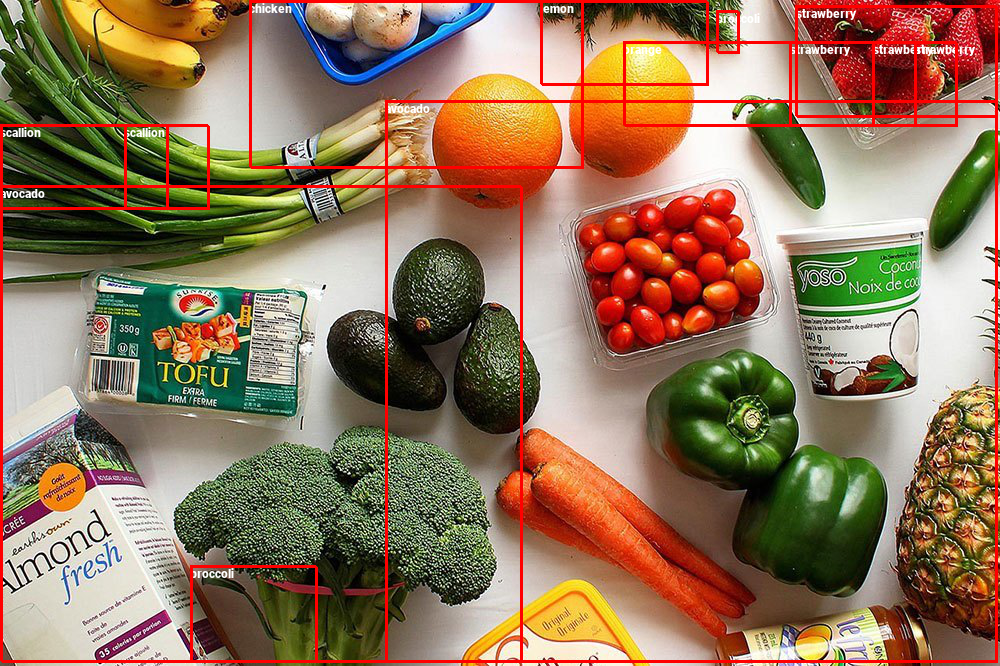

In [24]:
im